In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

pd.options.mode.chained_assignment = None

In [3]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2


In [6]:
df = pd.read_pickle(r'../data/interim/01_data_processed.pkl')
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [7]:
df = df[df['label'] != 'rest']

acc_r = df['acc_x'] **2 + df['acc_y'] **2 +df['acc_z'] **2 
gyr_r = df['gyr_x'] **2 + df['gyr_y'] **2 +df['gyr_z'] **2 


df['acc_r'] = np.sqrt(acc_r)
df['gyr_r'] = np.sqrt(gyr_r)

In [8]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,0.979669,3.225625
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,0.973752,2.887270
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,0.973795,2.936720
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,0.960118,9.473502
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,0.964953,4.623585
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,1.045408,5.804424
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,1.032376,3.611408
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,1.035995,5.869377


In [9]:
def count_reps(dataset , cutoff = 0.4 , order = 10 , column = 'acc_r'):
    
    fs = 1000 / 200

    lowpass =  LowPassFilter()
    
    data = lowpass.low_pass_filter(dataset , col= column , sampling_frequency=fs , cutoff_frequency= cutoff ,order=order )

    data[column + '_lowpass'].values

    indexes =  argrelextrema(data[column + '_lowpass'].values , np.greater)
    peaks =  data.iloc[indexes]
    
    plt.plot(data[column + '_lowpass'])
    plt.plot(peaks[column + '_lowpass'] , 'o' , color = 'red')
    
    print(data['category'][0])
    return len(peaks)

heavy


532

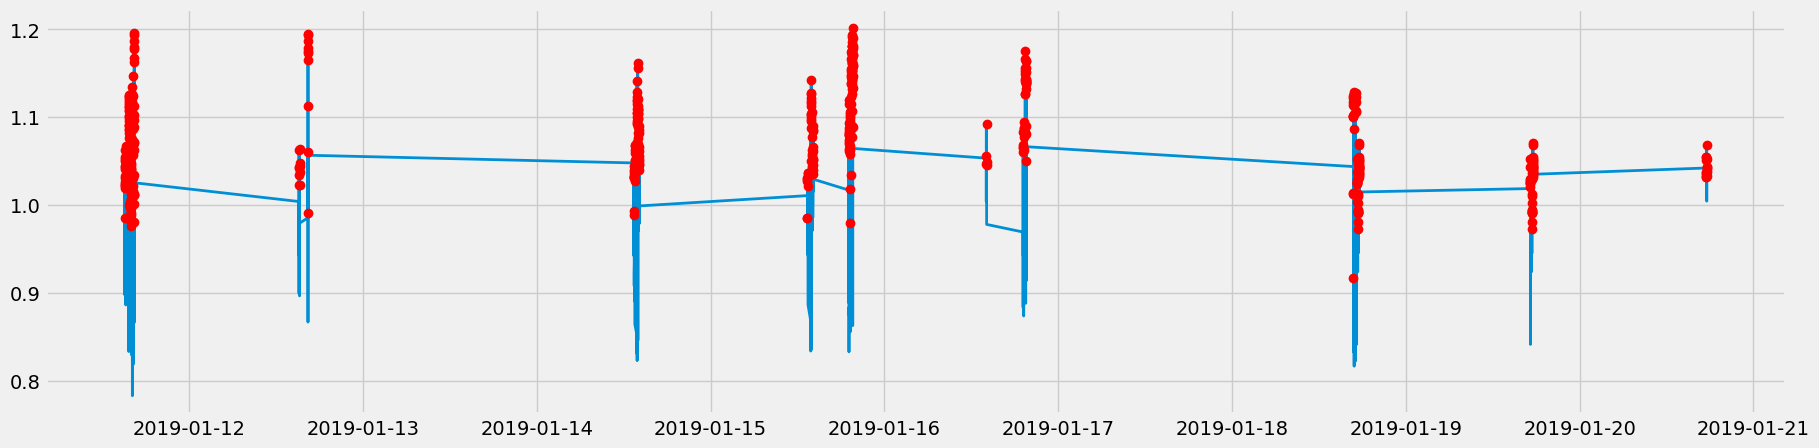

In [10]:
count_reps(df)

In [15]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,acc_r,gyr_r,acc_r_lowpass,reps
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,0.979669,3.225625,0.976882,5
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,0.973752,2.887270,0.956637,5
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,0.973795,2.936720,0.940791,5
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,0.960118,9.473502,0.932430,5
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,0.964953,4.623585,0.933304,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,1.045408,5.804424,1.038924,10
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,1.032376,3.611408,1.040415,10
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,1.035995,5.869377,1.040521,10


In [16]:
df_bench = df[df['label'] == 'bench']
df_ohp = df[df['label'] == 'ohp']
df_squat = df[df['label'] == 'squat']
df_dead = df[df['label'] == 'dead']
df_row = df[df['label'] == 'row']

In [17]:
bench_set =  df_bench[df_bench['set'] == df_bench['set'].unique()[0]]
ohe_set =  df_ohp[df_ohp['set'] == df_ohp['set'].unique()[11]]
squat_set =  df_squat[df_squat['set'] == df_squat['set'].unique()[0]]
dead_set =  df_dead[df_dead['set'] == df_dead['set'].unique()[0]]
row_set =  df_row[df_row['set'] == df_row['set'].unique()[0]]

In [18]:
bench_set

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,acc_r,gyr_r,acc_r_lowpass,reps
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,0.979669,3.225625,0.976882,5
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,0.973752,2.887270,0.956637,5
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,0.973795,2.936720,0.940791,5
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,0.960118,9.473502,0.932430,5
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,0.964953,4.623585,0.933304,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:08:21.200,-0.045333,0.958667,-0.062000,0.2074,-3.4512,-0.7072,B,bench,heavy,30,0.961738,3.529012,0.979845,5
2019-01-11 15:08:21.400,-0.051000,0.979000,-0.060500,1.5732,-2.0366,0.3170,B,bench,heavy,30,0.982193,2.592911,0.969034,5
2019-01-11 15:08:21.600,-0.050333,0.976000,-0.056667,0.2076,-2.8660,0.9756,B,bench,heavy,30,0.978938,3.034609,0.955422,5


heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
heavy
heavy
medium
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
medium
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
medium
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
heavy
medium
medium
medium
medium
heavy
medium
heavy
heavy
heavy
heavy
medium
medium
heavy
medium
medium
heavy
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium
medium


C:\Users\xobed\AppData\Local\Temp\ipykernel_15356\3146742345.py:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rep_df.groupby(['label' , 'category'])['reps' , 'reps_pred'].mean().plot(kind ='bar')


<Axes: xlabel='label,category'>

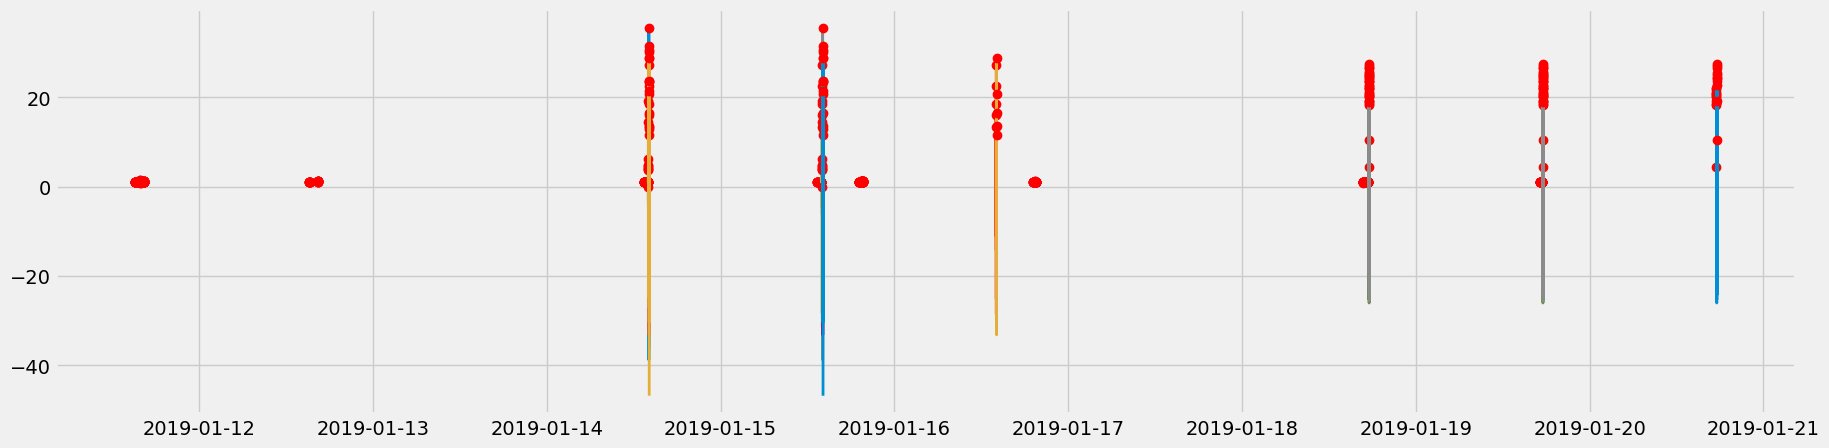

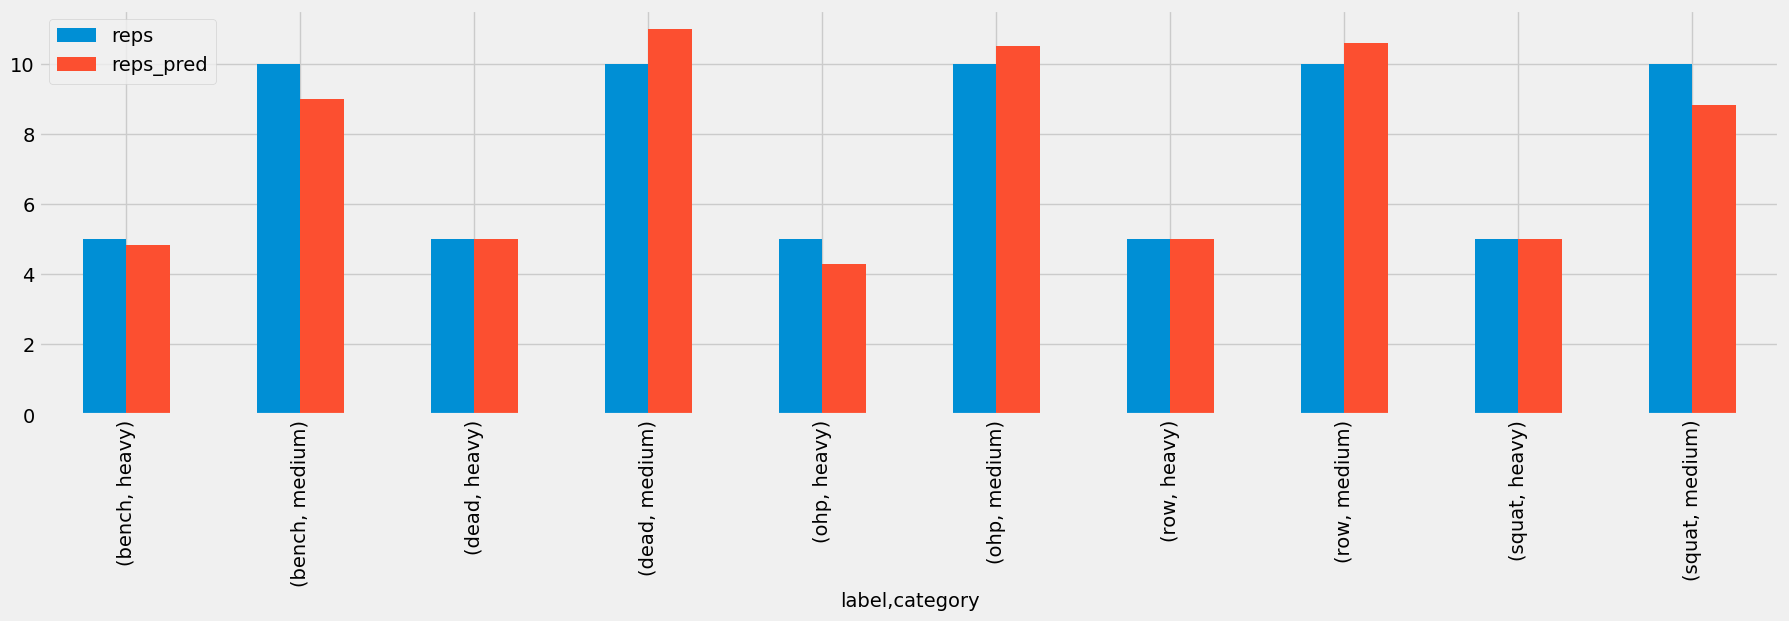

In [12]:




# --------------------------------------------------------------
# Create benchmark dataframe
# --------------------------------------------------------------

def 

df['reps'] = df['category'].apply(lambda x: 5 if x == 'heavy' else 10)


rep_df =  df.groupby(['label' , 'category' , 'set'])['reps'].max().reset_index()

rep_df[rep_df['label' ] == 'bench']
rep_df['reps_pred'] = 0

for s in df['set'].unique():
    subset=  df[df['set'] == s]
    
    column = 'acc_r'
    cutoff= 0.4
    
    if subset['label'][0] == 'squar':
        cutoff = 0.35
        
    if subset['label'][0] == 'row':
        cutoff = 0.65
        column = 'gyr_x'
        
    if subset['label'][0] == 'ohp' and  subset['category'][0] == 'heavy' :
        cutoff = 0.35
        
    if subset['label'][0] == 'ohp' and  subset['category'][0] == 'medium' :
        cutoff = 0.8
    
    reps = count_reps(subset , column= column , cutoff= cutoff)
    
    rep_df.loc[rep_df['set'] == s , 'reps_pred'] = reps
    
rep_df
# --------------------------------------------------------------
# Evaluate the results
# --------------------------------------------------------------

mean_absolute_error(rep_df['reps'] , rep_df['reps_pred'])

rep_df['reps'].mean()


rep_df.groupby(['label' , 'category'])['reps' , 'reps_pred'].mean().plot(kind ='bar')

In [14]:
reps

11